In [45]:
import pickle
import matplotlib.pyplot as plt
import numpy as np

mvORfd = 'mv'
scheme = 'hqc128'
n2=384
n = 17669
w = 66

template_path = f"./template_tmp/{mvORfd}/{scheme}"
with open(f'{template_path}/error_pattern_0.pkl', 'rb') as file:
    template = pickle.load(file)



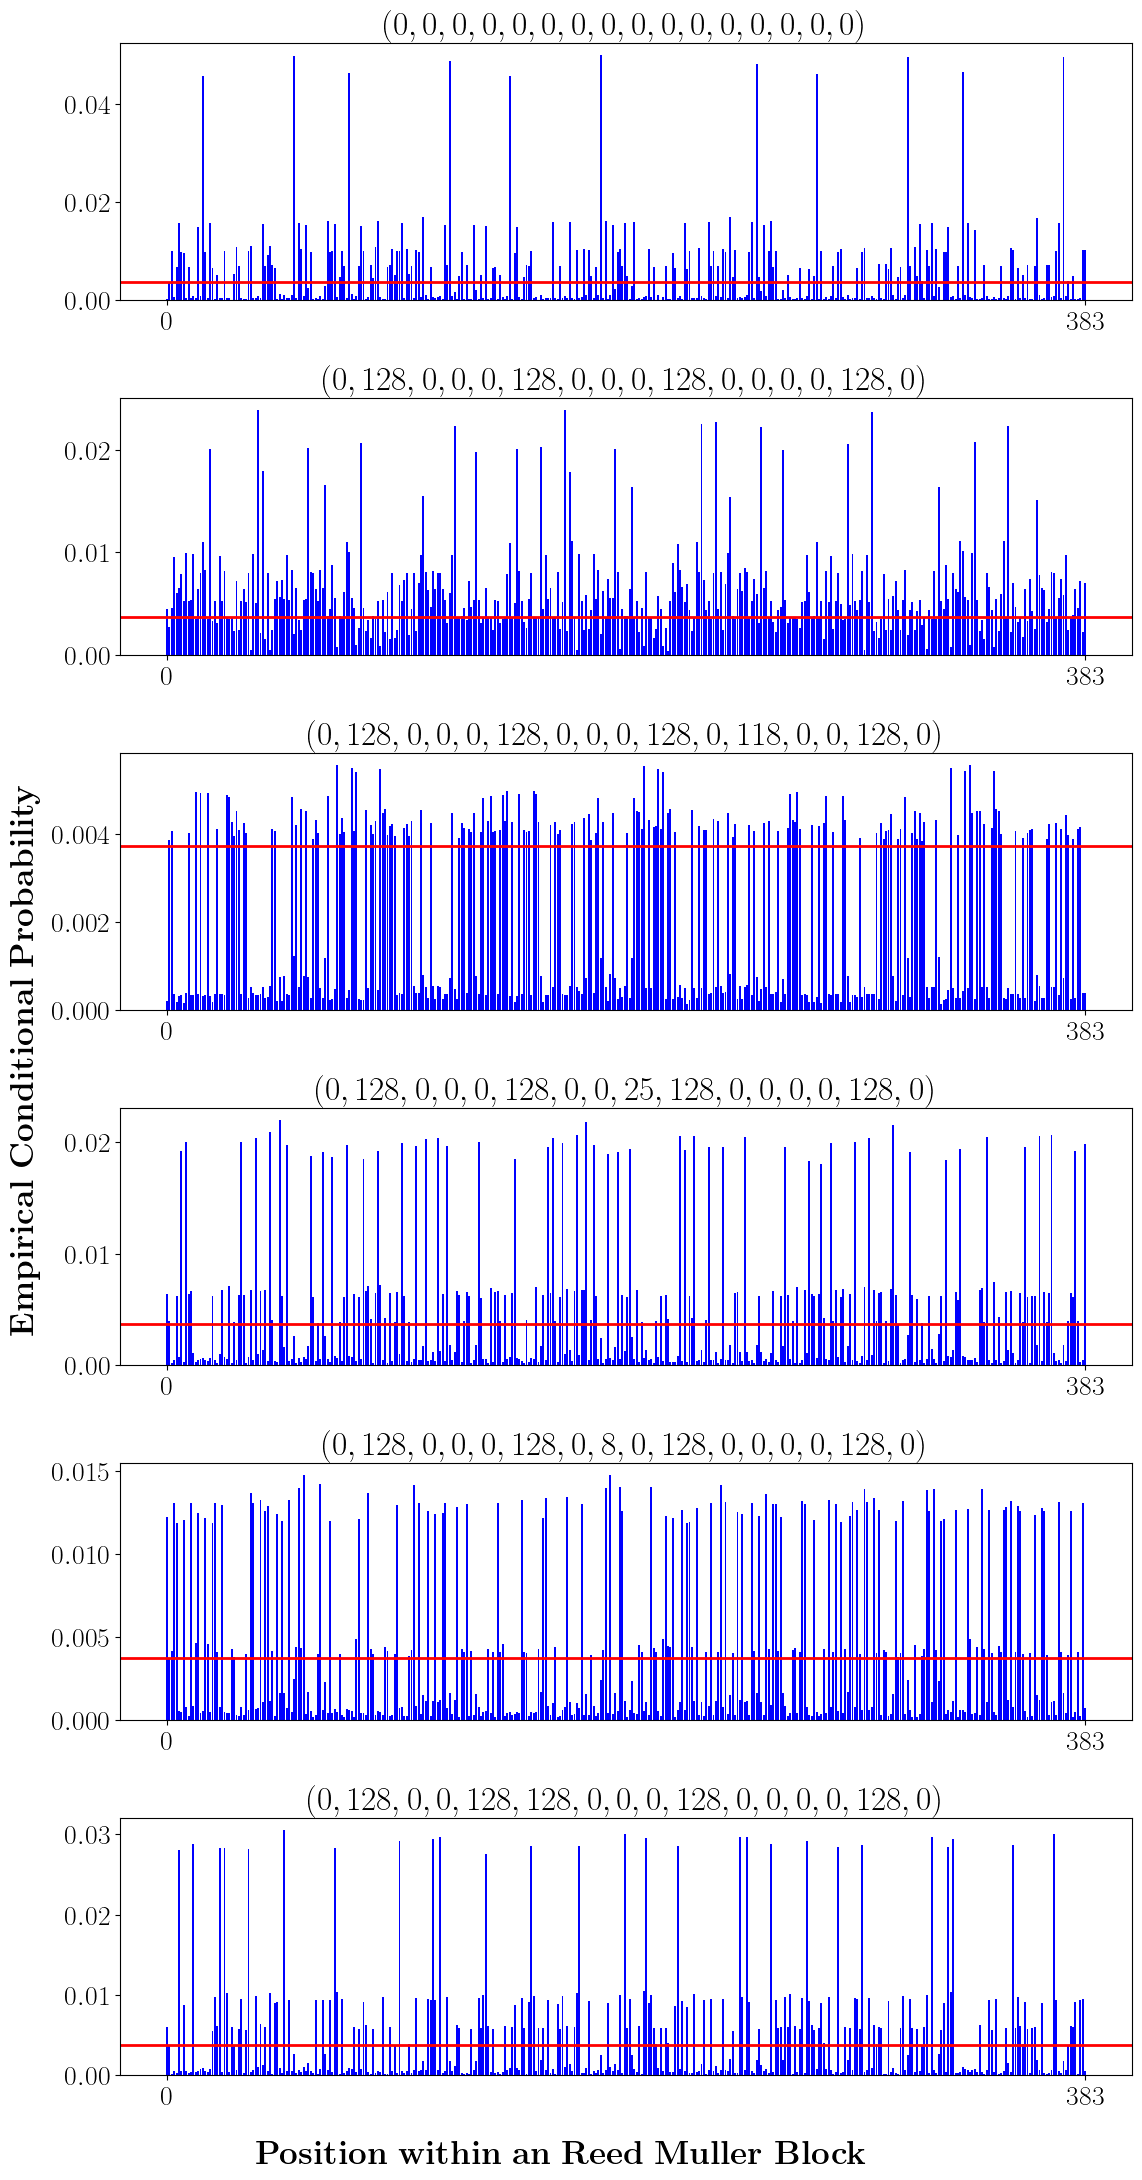

In [57]:
import logging

%matplotlib inline
logging.getLogger('matplotlib').setLevel(logging.DEBUG)
plt.rcParams['text.usetex'] = True
plt.rcParams['text.latex.preamble'] = r'\usepackage{amsmath}\usepackage{amsfonts}\usepackage{bm}'

plt.rcParams['font.size'] = 20 # Set the default font size
plt.rcParams['xtick.labelsize'] = 20  # X tick font size

keys = sorted(template.keys())  # Sorted keys for consistent ordering
num_keys = len(keys)
cols = 1  # Number of columns in subplot grid
rows = num_keys

fig, axes = plt.subplots(rows, cols, figsize=(12, 24), sharey=False)
#fig.suptitle(r'$\mathcal{T}_{e,m}$', fontsize=24, y=0.94)

# Flatten the axes array for easier indexing
axes = axes.flatten()

# Plot each key's distribution
for i, key in enumerate(keys):
    axes[i].bar(range(n2), template[key], color='blue')  # Set bar color to blue
    axes[i].set_title(r'${}$'.format(key), fontsize=24)
    axes[i].set_xticks([0, n2 - 1])  # Set x-labels to 0 and 383 (limits of x index)
    axes[i].set_xticklabels([r'$0$', r'${}$'.format(n2 - 1)])  # Use the same labels as the tick positions
    # Add a horizontal line
    line_y = w / n  # Calculate the y position of the line
    axes[i].axhline(y=line_y, color='red', linestyle='-', linewidth=2, label='y = w/n')


# Add mutual x-axis and y-axis labels
fig.text(0.5, 0.04, r'$\mathbf{Position\ within\ an\ Reed\ Muller\ Block}$', ha='center', fontsize=24)  # Mutual x-axis label
fig.text(0.04, 0.5, r'$\mathbf{Empirical\ Conditional\ Probability}$', va='center', rotation='vertical', fontsize=24)  # Mutual y-axis label

# Adjust layout to prevent overlap
plt.tight_layout(rect=[0.05, 0.05, 1, 0.95])

# Save the figure (optional)
#plt.savefig(f'./plot/mv/mv_{scheme}_e{e_indx}.png', dpi=300)  # Save as a PNG file with high resolution
plt.savefig('./plots/template_mv.pdf', format='pdf', bbox_inches='tight')

# Show the figure
plt.show()
plt.close()


In [58]:
import pickle
def load_probability_template_from_pickle(scheme,template,num_e_io,rho):
    if template=='io':
        filename = f'../code/probability_template/{scheme}_{template}_{num_e_io}_rho_{rho}.pkl'   
    
    # Open the file in binary read mode and load the dictionary
    with open(filename, 'rb') as file:
        probability_template = pickle.load(file)
    return probability_template

hqc128_rho1 = load_probability_template_from_pickle('HQC128','io',6,1.0)

first_nested_key = next(iter(hqc128_rho1))
first_nested_dict = hqc128_rho1[first_nested_key]

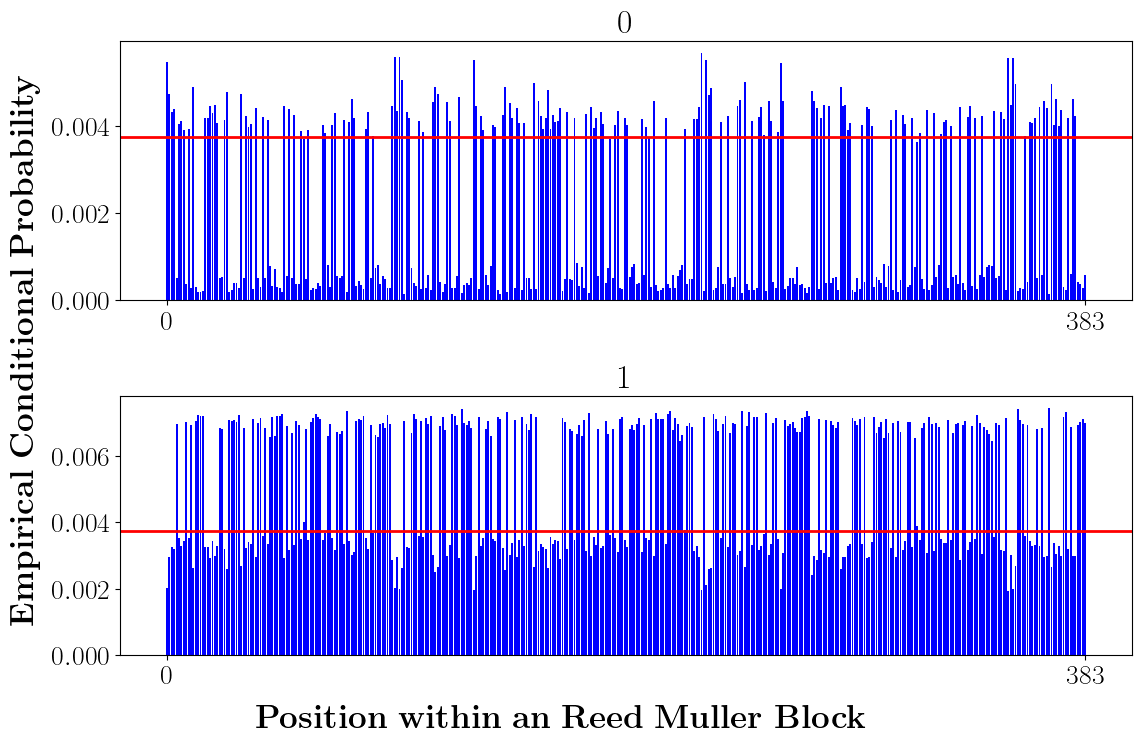

In [59]:
keys = sorted(first_nested_dict.keys())  # Sorted keys for consistent ordering
num_keys = len(keys)
cols = 1  # Number of columns in subplot grid
rows = num_keys

fig, axes = plt.subplots(rows, cols, figsize=(12, 8.22), sharey=False)
#fig.suptitle(r'$\mathcal{T}_{e,m}$', fontsize=24, y=0.94)

# Flatten the axes array for easier indexing
axes = axes.flatten()

# Plot each key's distribution
for i, key in enumerate(keys):
    axes[i].bar(range(n2), first_nested_dict[key], color='blue')  # Set bar color to blue
    axes[i].set_title(r'${}$'.format(key[0]), fontsize=24)
    axes[i].set_xticks([0, n2 - 1])  # Set x-labels to 0 and 383 (limits of x index)
    axes[i].set_xticklabels([r'$0$', r'${}$'.format(n2 - 1)])  # Use the same labels as the tick positions
    # Add a horizontal line
    line_y = w / n  # Calculate the y position of the line
    axes[i].axhline(y=line_y, color='red', linestyle='-', linewidth=2, label='y = w/n')


# Add mutual x-axis and y-axis labels
fig.text(0.5, 0.04, r'$\mathbf{Position\ within\ an\ Reed\ Muller\ Block}$', ha='center', fontsize=24)  # Mutual x-axis label
fig.text(0.04, 0.5, r'$\mathbf{Empirical\ Conditional\ Probability}$', va='center', rotation='vertical', fontsize=24)  # Mutual y-axis label

# Adjust layout to prevent overlap
plt.tight_layout(rect=[0.05, 0.05, 1, 0.95])

# Save the figure (optional)
plt.savefig('./plots/template_bi.pdf', format='pdf', bbox_inches='tight')

# Show the figure
plt.show()
plt.close()
